In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize
from scipy.stats import mstats

In [2]:
df = pd.read_csv("train - train.csv")

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


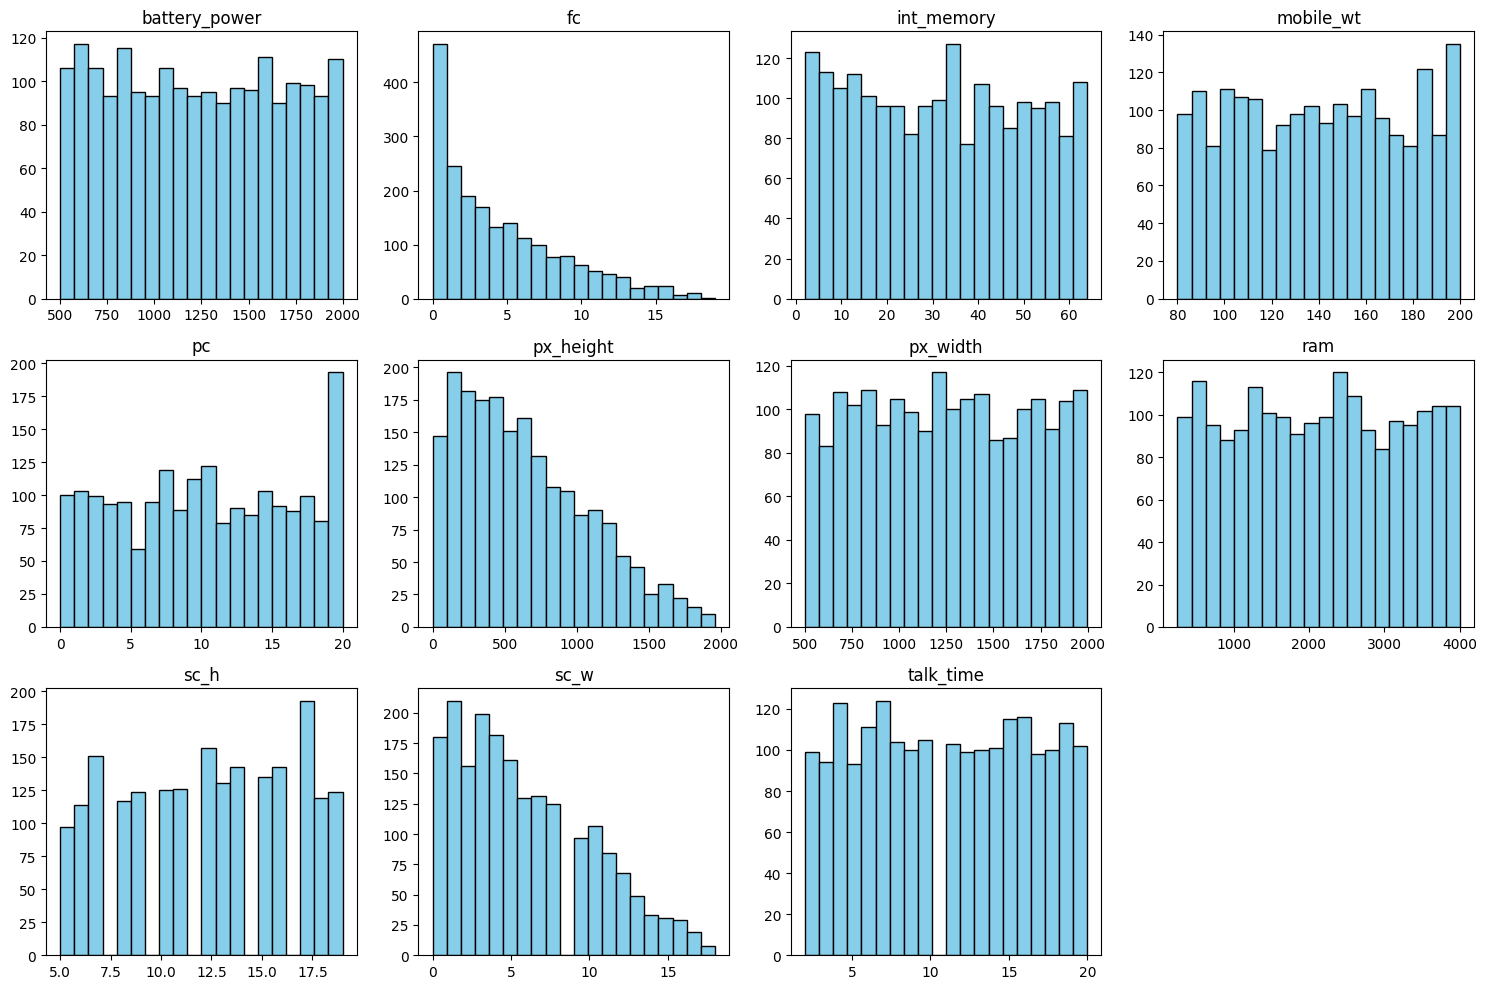

In [4]:
# Select numerical features
numerical_features = ['battery_power', 'fc', 'int_memory', 'mobile_wt', 
                      'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(feature)
plt.tight_layout()
plt.show()


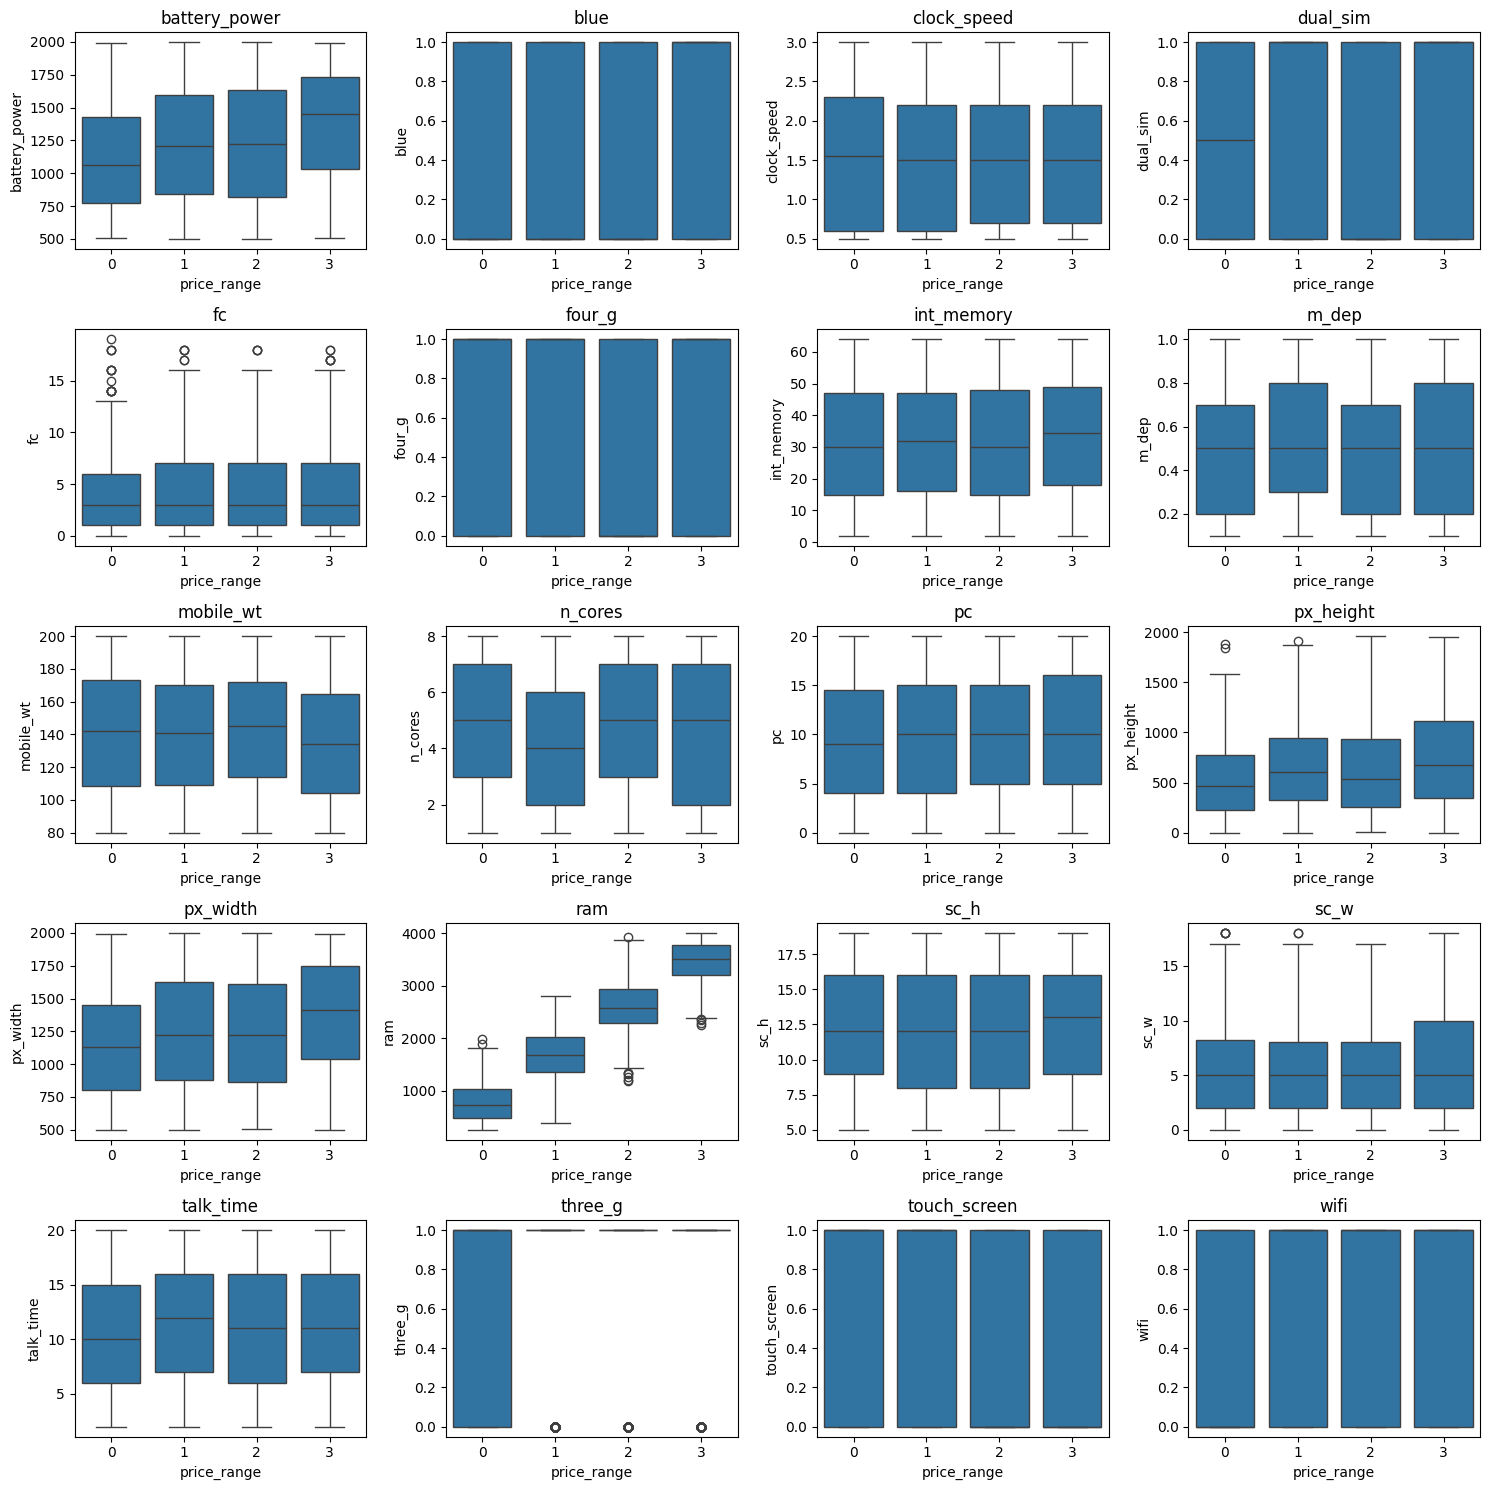

In [5]:
# Plot box plots for numerical features vs price_range
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.columns[0:-1], 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x='price_range', y=feature, data=df)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [6]:
mean_by_price_range = df.groupby('price_range').mean()
mean_by_price_range

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.060120,0.517034,31.224449,0.490381,140.615230,4.597194,9.557114,536.408000,1150.270000,785.314000,12.324000,5.682000,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.349398,0.524096,32.122490,0.525956,140.634538,4.293173,9.941884,667.845382,1250.995984,1677.901606,12.200401,5.541082,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498000,0.494000,30.920000,0.490800,143.614000,4.682000,10.002004,629.883768,1234.046000,2582.816000,12.010000,5.714000,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.333333,0.550201,33.931727,0.502004,136.196393,4.498998,10.162651,744.733467,1369.838000,3449.232000,12.680000,6.128000,11.098,0.770,0.496,0.524


In [7]:
count_by_price_range = df.groupby('price_range').agg(lambda x: x.value_counts().idxmax())
count_by_price_range

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,504,0,0.5,1,0.0,1.0,14.0,0.1,124.0,2.0,0.0,405.0,1247.0,590.0,14.0,3.0,4,1,1,0
1,1483,0,0.5,1,0.0,1.0,7.0,0.1,199.0,1.0,10.0,56.0,874.0,1464.0,17.0,4.0,7,1,1,1
2,730,0,0.5,0,0.0,0.0,2.0,0.1,145.0,4.0,7.0,614.0,1702.0,2334.0,7.0,1.0,15,1,0,1
3,1589,1,0.5,1,0.0,1.0,44.0,0.1,88.0,5.0,7.0,347.0,1836.0,3142.0,17.0,1.0,7,1,0,1


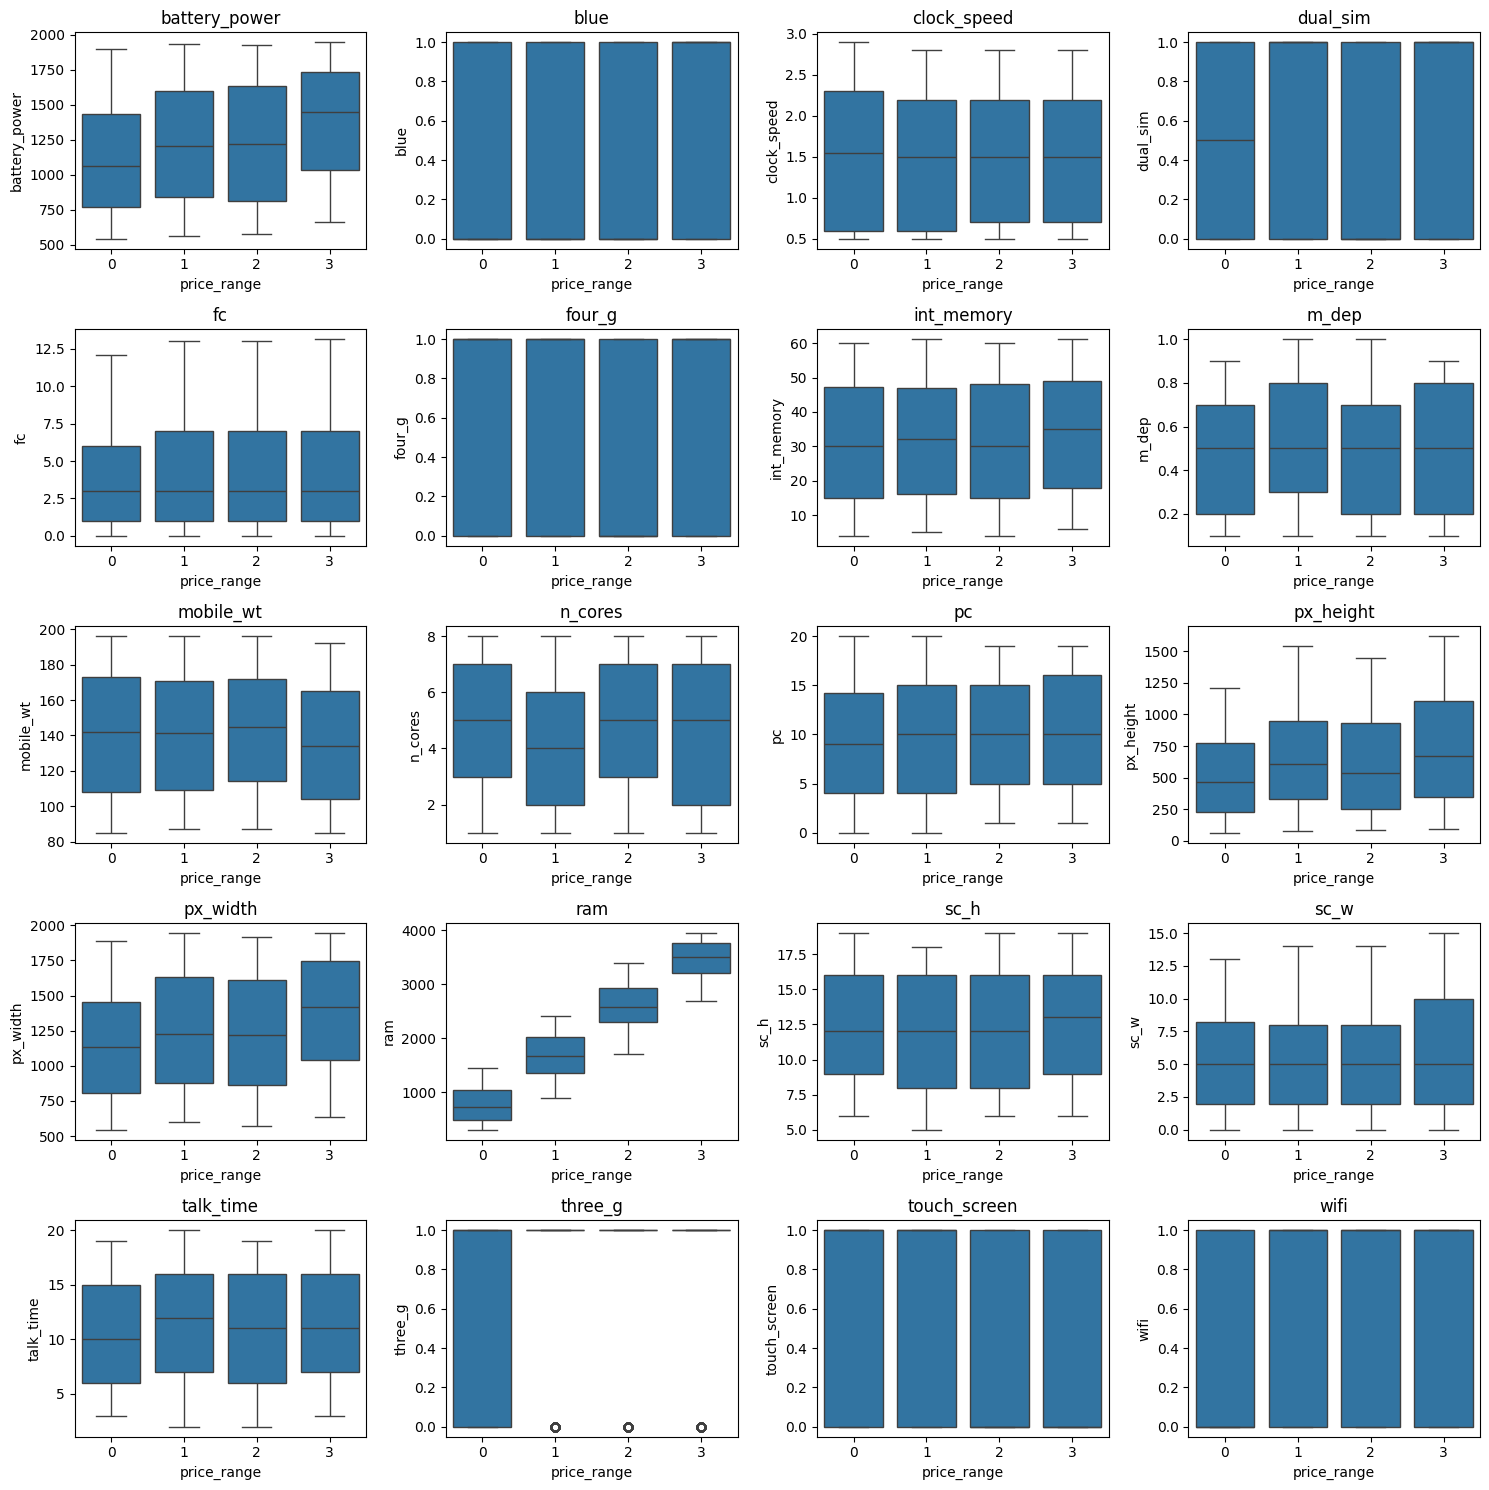

In [8]:
df_C0 = df[df.price_range==0]
df_C1 = df[df.price_range==1]
df_C2 = df[df.price_range==2]
df_C3 = df[df.price_range==3]

# Apply Winsorization to the DataFrame
for name_df in ['df_C0', 'df_C1', 'df_C2', 'df_C3']:  # Assuming these are the names of your DataFrames

    features_to_winsorize = globals()[f"{name_df}"].columns[0:-1]
    for feature in features_to_winsorize:
        lower_limit = globals()[f"{name_df}"][feature].quantile(0.05)
        upper_limit = globals()[f"{name_df}"][feature].quantile(0.95)
        globals()[f"{name_df}"].loc[:, feature] = globals()[f"{name_df}"][feature].clip(lower=lower_limit, upper=upper_limit)



df_C0 = df_C0.ffill()
df_C1 = df_C1.ffill()
df_C2 = df_C2.ffill()
df_C3 = df_C3.ffill() 

merged_df = pd.concat([df_C0, df_C1, df_C2, df_C3], axis=0) 
features_to_winsorize = merged_df.columns[0:-1]     
      
# Plot boxplots after Winsorization
plt.figure(figsize=(15, 15))
for i, feature in enumerate(features_to_winsorize, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x='price_range', y=feature, data=merged_df)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [9]:
merged_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
7,1897.00,0,0.5,1,0.0,0.0,24.0,0.8,187.0,4.0,...,512.0,1149.0,700.0,16.0,3.0,5,1,1,1,0
8,1445.00,1,0.5,0,0.0,0.0,53.0,0.7,174.0,7.0,...,386.0,836.0,1099.0,17.0,1.0,19,1,0,0,0
9,543.95,1,0.6,1,2.0,1.0,9.0,0.1,93.0,5.0,...,1137.0,1224.0,513.0,19.0,10.0,12,1,0,0,0
14,1866.00,0,0.5,0,12.1,1.0,52.0,0.7,185.0,1.0,...,356.0,563.0,373.0,14.0,9.0,3,1,0,1,0
15,775.00,0,1.0,0,3.0,0.0,46.0,0.7,159.0,2.0,...,862.0,1864.0,568.0,17.0,13.0,11,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1882.00,0,2.0,0,11.0,1.0,44.0,0.8,113.0,8.0,...,94.6,743.0,3579.0,19.0,8.0,20,1,1,0,3
1993,1467.00,1,0.5,0,0.0,0.0,18.0,0.6,122.0,5.0,...,888.0,1099.0,3946.1,15.0,11.0,5,1,1,1,3
1994,858.00,0,2.2,0,1.0,0.0,50.0,0.1,85.0,1.0,...,528.0,1416.0,3946.1,17.0,15.0,3,1,1,0,3
1997,1911.00,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3


In [14]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib


# Split features and target variable
X = merged_df.drop('price_range', axis=1)
y = merged_df['price_range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Train the XGBoost model
modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)

# Make predictions
y_pred = modelXGB.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred)

# Train the Random Forest model
modelRF = RandomForestClassifier(n_estimators=250, random_state=1)
modelRF.fit(X_train, y_train)

# Make predictions
y_pred = modelRF.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)


print("Accuracy XGB :", accuracy_xgb, "Accuracy RF :", accuracy_rf)

# Save the trained model to a file
joblib.dump(modelRF, 'random_forest_model.pkl')

Accuracy XGB : 0.975 Accuracy RF : 0.97


['random_forest_model.pkl']

In [21]:
import numpy as np

# Your input data
input_data = np.array([0, 0, 0.0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Reshape the input data to have 1 row and multiple columns (-1 indicates that the number of columns is inferred)
input_data_reshaped = input_data.reshape(1, -1)

# Now you can use the reshaped input data to make predictions
predicted_price = modelRF.predict(input_data_reshaped)
predicted_price

C:\Users\Elsou\anaconda3\envs\yolo\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)